In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
import pandas as pd
import numpy as np

In [3]:
from agent import MABAgent
from agent import get_concept_drift
from agent import code_action

In [4]:
data = '../sarss.h5'

In [5]:
n_actions = 11 * 15

In [6]:
agent = MABAgent(n_actions=n_actions)

## get data

In [7]:
data_all = pd.read_hdf(data, key='sarss')
# process only traffic from both stations going to google
data = data_all[data_all['sites'] == ('google', 'google')]
columns_to_convert = ['new_channel', 'new_txpower', 'r']
# generates warning >> SettingWithCopyWarning
data.loc[:, columns_to_convert] = data.loc[:, columns_to_convert].astype('float')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
# define number of instances to use

n = data.shape[0]
n = 1800

In [9]:
data_to_use = data.iloc[:n, :]

In [10]:
drifts = get_concept_drift(data_to_use, n_train=40)  # get drift points from data
print("num drifts", len(drifts))

num drifts 6


# MAB iterations

In [11]:
t = 1
T = 2
double_trick = True
__iterations = []

for __iter in range(n):
    __d = data_to_use.iloc[__iter, :]
    """
        a) get data from real execution, including the action performed --ea
        b) get action proposed by the algorithm -- a
        c) compare result: ea == a ?
        d) probability of selecting ea?
        e) concept drift? yes, mark this point
        f) update system using pa, so the system learns the real environment

    """
    new_channel = float(__d['new_channel'])
    new_txpower = float(__d['new_txpower'])

    a = agent.get_action()  # best action using the current knowledge
    ea = code_action(new_channel, new_txpower)  # action performed

    Pa = agent.prob_action(a) * 100
    Pea = agent.prob_action(ea) * 100

    r = __d['r']  # reward received
    drift = __iter in drifts
    print('{} t: {} ch{} pwr {} Estimated action: {}[P={}] Actual action: {}[P={}] Reward: {} Drift {}'.format(__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift))

    __iterations.append([__iter, t, new_channel, new_txpower, ea, Pea, a, Pa, r, drift])
    # don't need to run_action
    # r, success = agent.run_action(a)
    agent.update(ea, r)  # update using the executed action in order to learn

    t += 1
    if double_trick and t > T:
        t = 1
        agent.reset_pulls()
        try:
            T = 2 * T
        except OverflowError:
            T = args.T

0 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=0.6060606060606061] Actual action: 0[P=0.6060606060606061] Reward: 5.0 Drift False
1 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=39.061642643208785] Actual action: 82[P=39.061642643208785] Reward: 4.5117215 Drift False
2 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=41.48367793631152] Actual action: 82[P=41.48367793631152] Reward: 4.56176425 Drift False
3 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=26.94510449271934] Actual action: 82[P=26.94510449271934] Reward: 4.56176425 Drift False
4 t: 3 ch2.0 pwr 8.0 Estimated action: 82[P=22.089620980078912] Actual action: 82[P=22.089620980078912] Reward: 4.56176425 Drift False
5 t: 4 ch2.0 pwr 8.0 Estimated action: 82[P=19.06495931634829] Actual action: 82[P=19.06495931634829] Reward: 3.820358 Drift False
6 t: 1 ch2.0 pwr 8.0 Estimated action: 82[P=35.50369744883907] Actual action: 82[P=35.50369744883907] Reward: 3.4367145 Drift False
7 t: 2 ch2.0 pwr 8.0 Estimated action: 82[P=18.087725041274368] Actual acti

154 t: 29 ch3.0 pwr 1.0 Estimated action: 13[P=4.6792368515073575] Actual action: 13[P=4.6792368515073575] Reward: 4.548559375 Drift False
155 t: 30 ch3.0 pwr 1.0 Estimated action: 13[P=4.626767472550062] Actual action: 13[P=4.626767472550062] Reward: 4.548559375 Drift False
156 t: 31 ch3.0 pwr 1.0 Estimated action: 13[P=4.576677678312795] Actual action: 13[P=4.576677678312795] Reward: 4.548559375 Drift False
157 t: 32 ch3.0 pwr 1.0 Estimated action: 13[P=4.52878274062888] Actual action: 13[P=4.52878274062888] Reward: 4.548559375 Drift False
158 t: 33 ch3.0 pwr 1.0 Estimated action: 13[P=4.482917756388119] Actual action: 13[P=4.482917756388119] Reward: 4.548559375 Drift False
159 t: 34 ch3.0 pwr 1.0 Estimated action: 13[P=4.4389349760783325] Actual action: 13[P=4.4389349760783325] Reward: 4.548559375 Drift False
160 t: 35 ch3.0 pwr 1.0 Estimated action: 13[P=4.396701560717699] Actual action: 13[P=4.396701560717699] Reward: 4.548559375 Drift False
161 t: 36 ch3.0 pwr 1.0 Estimated actio

402 t: 149 ch3.0 pwr 1.0 Estimated action: 13[P=2.7486453575990684] Actual action: 13[P=2.7486453575990684] Reward: 4.7133495 Drift False
403 t: 150 ch3.0 pwr 1.0 Estimated action: 13[P=2.7439792299354355] Actual action: 13[P=2.7439792299354355] Reward: 4.7133495 Drift False
404 t: 151 ch3.0 pwr 1.0 Estimated action: 13[P=2.739353916652146] Actual action: 13[P=2.739353916652146] Reward: 4.7133495 Drift False
405 t: 152 ch3.0 pwr 1.0 Estimated action: 13[P=2.7347687657435964] Actual action: 13[P=2.7347687657435964] Reward: 4.7133495 Drift False
406 t: 153 ch3.0 pwr 1.0 Estimated action: 13[P=2.730223140059752] Actual action: 13[P=2.730223140059752] Reward: 4.7133495 Drift False
407 t: 154 ch3.0 pwr 1.0 Estimated action: 13[P=2.725716416871624] Actual action: 13[P=2.725716416871624] Reward: 4.7133495 Drift False
408 t: 155 ch3.0 pwr 1.0 Estimated action: 13[P=2.721247987452053] Actual action: 13[P=2.721247987452053] Reward: 4.7133495 Drift False
409 t: 156 ch3.0 pwr 1.0 Estimated action:

659 t: 150 ch3.0 pwr 1.0 Estimated action: 13[P=2.7696714168274617] Actual action: 13[P=2.7696714168274617] Reward: 4.7252125 Drift False
660 t: 151 ch3.0 pwr 1.0 Estimated action: 13[P=2.7646140058097455] Actual action: 13[P=2.7646140058097455] Reward: 4.7252125 Drift False
661 t: 152 ch3.0 pwr 1.0 Estimated action: 13[P=2.7596024607241336] Actual action: 13[P=2.7596024607241336] Reward: 4.7252125 Drift False
662 t: 153 ch3.0 pwr 1.0 Estimated action: 13[P=2.7546360528572644] Actual action: 13[P=2.7546360528572644] Reward: 4.7252125 Drift False
663 t: 154 ch3.0 pwr 1.0 Estimated action: 13[P=2.749714069821325] Actual action: 13[P=2.749714069821325] Reward: 4.7252125 Drift False
664 t: 155 ch3.0 pwr 1.0 Estimated action: 13[P=2.7448358150841035] Actual action: 13[P=2.7448358150841035] Reward: 4.7252125 Drift False
665 t: 156 ch3.0 pwr 1.0 Estimated action: 13[P=2.740000607515651] Actual action: 13[P=2.740000607515651] Reward: 4.7252125 Drift False
666 t: 157 ch3.0 pwr 1.0 Estimated act

924 t: 415 ch3.0 pwr 1.0 Estimated action: 13[P=2.086383342002278] Actual action: 13[P=2.086383342002278] Reward: 4.51673825 Drift False
925 t: 416 ch3.0 pwr 1.0 Estimated action: 13[P=2.084649374750769] Actual action: 13[P=2.084649374750769] Reward: 4.51673825 Drift False
926 t: 417 ch3.0 pwr 1.0 Estimated action: 13[P=2.0829210546933776] Actual action: 13[P=2.0829210546933776] Reward: 4.51673825 Drift False
927 t: 418 ch3.0 pwr 1.0 Estimated action: 13[P=2.0811983507030396] Actual action: 13[P=2.0811983507030396] Reward: 4.51673825 Drift False
928 t: 419 ch3.0 pwr 1.0 Estimated action: 13[P=2.079481231896412] Actual action: 13[P=2.079481231896412] Reward: 4.51673825 Drift False
929 t: 420 ch3.0 pwr 1.0 Estimated action: 13[P=2.077769667631422] Actual action: 13[P=2.077769667631422] Reward: 4.51673825 Drift False
930 t: 421 ch3.0 pwr 1.0 Estimated action: 13[P=2.0760636275047797] Actual action: 13[P=2.0760636275047797] Reward: 4.51673825 Drift False
931 t: 422 ch3.0 pwr 1.0 Estimated 

1106 t: 85 ch1.0 pwr 5.0 Estimated action: 51[P=3.825401936805968] Actual action: 51[P=3.825401936805968] Reward: 4.7133495 Drift False
1107 t: 86 ch1.0 pwr 5.0 Estimated action: 51[P=3.8122557065767366] Actual action: 51[P=3.8122557065767366] Reward: 4.7133495 Drift False
1108 t: 87 ch1.0 pwr 5.0 Estimated action: 51[P=3.7992563939541335] Actual action: 51[P=3.7992563939541335] Reward: 4.7073795 Drift False
1109 t: 88 ch1.0 pwr 5.0 Estimated action: 51[P=3.7861199133736623] Actual action: 51[P=3.7861199133736623] Reward: 4.693501125 Drift False
1110 t: 89 ch1.0 pwr 5.0 Estimated action: 51[P=3.772490114344758] Actual action: 51[P=3.772490114344758] Reward: 4.693501125 Drift False
1111 t: 90 ch1.0 pwr 5.0 Estimated action: 51[P=3.7590314774272238] Actual action: 51[P=3.7590314774272238] Reward: 4.693501125 Drift False
1112 t: 91 ch1.0 pwr 5.0 Estimated action: 51[P=3.7457410355010143] Actual action: 51[P=3.7457410355010143] Reward: 4.693501125 Drift False
1113 t: 92 ch1.0 pwr 5.0 Estim

1329 t: 308 ch1.0 pwr 5.0 Estimated action: 51[P=2.4608001059996165] Actual action: 51[P=2.4608001059996165] Reward: 4.70259225 Drift False
1330 t: 309 ch1.0 pwr 5.0 Estimated action: 51[P=2.458392236171659] Actual action: 51[P=2.458392236171659] Reward: 4.70259225 Drift False
1331 t: 310 ch1.0 pwr 5.0 Estimated action: 51[P=2.455994321175147] Actual action: 51[P=2.455994321175147] Reward: 4.70259225 Drift False
1332 t: 311 ch1.0 pwr 5.0 Estimated action: 51[P=2.4536062920545065] Actual action: 51[P=2.4536062920545065] Reward: 4.70259225 Drift False
1333 t: 312 ch1.0 pwr 5.0 Estimated action: 51[P=2.4512280805096203] Actual action: 51[P=2.4512280805096203] Reward: 4.70259225 Drift False
1334 t: 313 ch1.0 pwr 5.0 Estimated action: 51[P=2.448859618888024] Actual action: 51[P=2.448859618888024] Reward: 4.70259225 Drift False
1335 t: 314 ch1.0 pwr 5.0 Estimated action: 51[P=2.446500840177407] Actual action: 51[P=2.446500840177407] Reward: 4.70259225 Drift False
1336 t: 315 ch1.0 pwr 5.0 Es

1650 t: 629 ch5.0 pwr 8.0 Estimated action: 85[P=2.4025628859792714] Actual action: 85[P=2.4025628859792714] Reward: 4.7726525 Drift False
1651 t: 630 ch5.0 pwr 8.0 Estimated action: 85[P=2.3996331080706432] Actual action: 85[P=2.3996331080706432] Reward: 4.7726525 Drift False
1652 t: 631 ch5.0 pwr 8.0 Estimated action: 85[P=2.3967280679227687] Actual action: 85[P=2.3967280679227687] Reward: 4.7726525 Drift False
1653 t: 632 ch5.0 pwr 8.0 Estimated action: 85[P=2.3938473555221234] Actual action: 85[P=2.3938473555221234] Reward: 4.7726525 Drift False
1654 t: 633 ch5.0 pwr 8.0 Estimated action: 85[P=2.3909905705661387] Actual action: 85[P=2.3909905705661387] Reward: 4.7726525 Drift False
1655 t: 634 ch5.0 pwr 8.0 Estimated action: 85[P=2.3881573221725256] Actual action: 85[P=2.3881573221725256] Reward: 4.7726525 Drift False
1656 t: 635 ch5.0 pwr 8.0 Estimated action: 85[P=2.3853472285990502] Actual action: 85[P=2.3853472285990502] Reward: 4.7726525 Drift False
1657 t: 636 ch5.0 pwr 8.0 E

# Plot evolution

In [12]:
drifts_inGraph = np.array(drifts)
drifts_inGraph = drifts_inGraph[drifts_inGraph < n]

In [13]:
# drifts_inGraph

In [14]:
def plot_drifts(ax, drifts, _max, _min=0):
    first_ = True
    for x in drifts:
        if first_:
            ax.plot([x, x], [_min, _max], color='green', label='Drift detected')
            first_ = False
        else:
            ax.plot([x, x], [_min, _max], color='green')

In [15]:
__r = data_to_use.iloc[:n, :]['r']

In [17]:
font = {'family' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

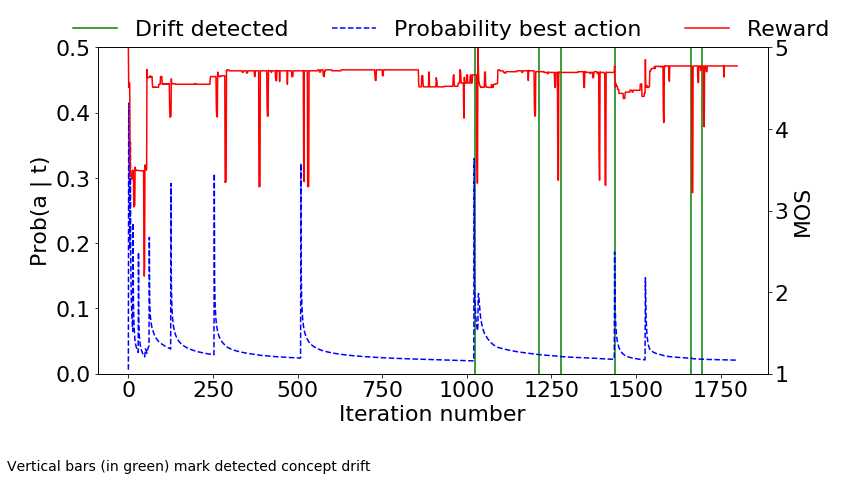

In [25]:
x = [v[0] for v in __iterations]
p1 = [v[5] / 100.0 for v in __iterations]
p2 = [v[7] / 100.0 for v in __iterations]

max_y = np.ceil(max(np.max(p1), np.max(p2)) * 10) / 10

fig = plt.figure()
ax1 = plt.gca()

plot_drifts(ax1, drifts_inGraph, max_y)
# plt.plot(x, p1, ":", label='Best estimated probability', color='red')  # ":"
plt.plot(x, p2, "--", label='Probability best action', color='blue')  # "--"
ax1.set_ylabel("Prob(a | t)")
ax1.set_xlabel("Iteration number")
# ax1.set_title("Probability of action and Reward")
ax1.set_ylim(0, max_y)


ax2 = ax1.twinx()
ax2.plot(x, __r, "-", label='Reward', color='red')  # ":"
ax2.set_ylabel("MOS")
ax2.set_ylim(1, 5)

#fig.legend(loc='upper left', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.legend(loc=1, ncol=3, frameon=False)

_ = plt.text(0.02, -0.1, 'Vertical bars (in green) mark detected concept drift', fontsize=14, transform=plt.gcf().transFigure)

plt.savefig('Detection.pdf', quality=100, dpi=600, papertype='A4')